In [ ]:
mobinetv2 :https://www.kaggle.com/code/sandeep1022/transfer-learning-classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#title changing the working directory 
%cd /content/drive/MyDrive/garbage
#Check the present working directory using pwd command

/content/drive/MyDrive/garbage


In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"huyquang13","key":"8ac918c4910d75b81b2550a75495c94c"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
from google.colab import files
import json

# files.upload()
#upload the kaggle json file
sample_uploaded_data = json.load(open('/root/.kaggle/kaggle.json'))
print(sample_uploaded_data)

In [ ]:
#update kaggle api
!pip install --upgrade --force-reinstall --no-deps kaggle

In [ ]:
!kaggle datasets download -d asdasdasasdas/garbage-classification


In [ ]:
!ls

In [ ]:
!pip install unrar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!unrar x "/content/drive/MyDrive/garbage/Garbage classification.rar" 


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/garbage/Garbage classification.rar

Creating    Garbage classification                                    OK
Creating    Garbage classification/box_cardboard_paper                OK
Extracting  Garbage classification/box_cardboard_paper/00002520.jpg        0%  OK 
Extracting  Garbage classification/box_cardboard_paper/00002521.jpg        0%  OK 
Extracting  Garbage classification/box_cardboard_paper/00002522.jpg        0%  OK 
Extracting  Garbage classification/box_cardboard_paper/00002523.jpg        0%  OK 
Extracting  Garbage classification/box_cardboard_paper/00002524.jpg        0%  OK 
Extracting  Garbage classification/box_cardboard_paper/00002525.jpg        0%  OK 
Extracting  Garbage classification/box_cardboard_paper/00002526.jpg        0%  OK 
Extracting  Garbage classification/box_cardboard_paper/00002527.jp

In [3]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import glob
import matplotlib.pyplot as plt

In [17]:
train_dir = "/content/drive/MyDrive/garbage/Garbage classification"
dataset_path=train_dir
img_list = glob.glob(os.path.join(dataset_path,'*/*.jpg'))


In [14]:
# a=[]
# a=img_list
# a=set(a)
# a=list(a)
# res=0
# for i in range(len(a)):
#   if a[i]==img_list[i]:res+=1
# print(res)

1


In [18]:
len(img_list)

3519

In [19]:
img_list[0]

'/content/drive/MyDrive/garbage/Garbage classification/box_cardboard_paper/00002520.jpg'

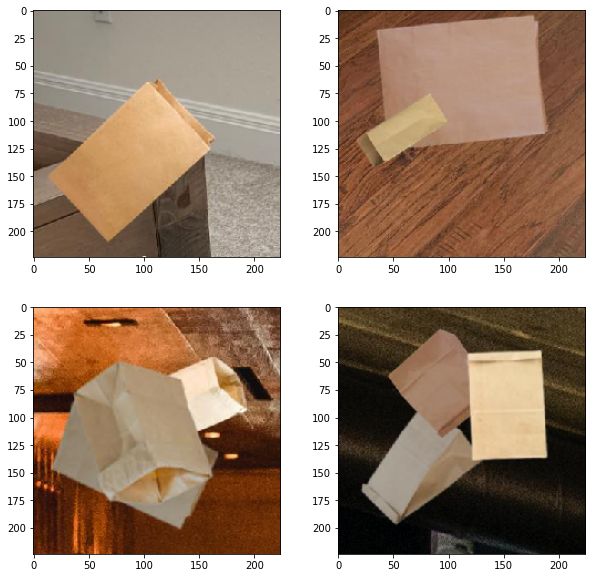

In [21]:
plt.figure(figsize=(10,10))
for i in range(0,4):
  img = tf.keras.preprocessing.image.load_img(img_list[i+1],target_size=(224,224))
  img = tf.keras.preprocessing.image.img_to_array(img,dtype=np.uint8)
  plt.subplot(2,2,i+1)
  plt.imshow(img)

In [22]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
    #shuffle tự hiểu là true
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [23]:
train_generator = train_generator.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

test_generator = test_generator.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

Found 3170 images belonging to 4 classes.
Found 702 images belonging to 4 classes.


In [24]:
model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),include_top=False, weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [25]:
input_layer = model.layers[0].input
inputs= model.layers[-1].output
x = tf.keras.layers.Conv2D(128,kernel_size=(3,3),strides=(1,1),activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(4,activation='softmax')(x)
myModel = tf.keras.Model(input_layer,x)
# myModel.trainable=False
myModel.summary() 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [26]:
from keras.utils.vis_utils import plot_model
plot_model(myModel, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Output hidden; open in https://colab.research.google.com to view.

In [27]:
myModel.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [28]:
history= myModel.fit(train_generator,validation_data=test_generator,epochs=20,batch_size=16)


Epoch 1/20
199/199 [==============================] - 65s 259ms/step - loss: 0.8111 - accuracy: 0.7555 - val_loss: 3.0576 - val_accuracy: 0.6325
Epoch 2/20
199/199 [==============================] - 49s 246ms/step - loss: 0.5644 - accuracy: 0.8123 - val_loss: 16.0107 - val_accuracy: 0.3120
Epoch 3/20
199/199 [==============================] - 49s 246ms/step - loss: 0.4662 - accuracy: 0.8454 - val_loss: 3.8567 - val_accuracy: 0.4501
Epoch 4/20
199/199 [==============================] - 50s 252ms/step - loss: 0.3415 - accuracy: 0.8893 - val_loss: 8.5062 - val_accuracy: 0.3718
Epoch 5/20
199/199 [==============================] - 49s 245ms/step - loss: 0.3404 - accuracy: 0.8899 - val_loss: 4.9539 - val_accuracy: 0.4330
Epoch 6/20
199/199 [==============================] - 49s 245ms/step - loss: 0.3769 - accuracy: 0.8754 - val_loss: 7.4241 - val_accuracy: 0.3105
Epoch 7/20
199/199 [==============================] - 49s 244ms/step - loss: 0.3276 - accuracy: 0.8915 - val_loss: 2.2933 - val_a

In [29]:
history= myModel.fit(train_generator,validation_data=test_generator,epochs=5,batch_size=16)


Epoch 1/5
199/199 [==============================] - 50s 252ms/step - loss: 0.1763 - accuracy: 0.9442 - val_loss: 1.3076 - val_accuracy: 0.8091
Epoch 2/5
199/199 [==============================] - 49s 247ms/step - loss: 0.1713 - accuracy: 0.9388 - val_loss: 1.6701 - val_accuracy: 0.7550
Epoch 3/5
199/199 [==============================] - 49s 246ms/step - loss: 0.1803 - accuracy: 0.9353 - val_loss: 2.2998 - val_accuracy: 0.6439
Epoch 4/5
199/199 [==============================] - 49s 245ms/step - loss: 0.2663 - accuracy: 0.9189 - val_loss: 2.0177 - val_accuracy: 0.5370
Epoch 5/5
199/199 [==============================] - 50s 252ms/step - loss: 0.2273 - accuracy: 0.9262 - val_loss: 3.2484 - val_accuracy: 0.5812


In [30]:
checkpoint_filepath = '/content/drive/MyDrive/garbage/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
history= myModel.fit(train_generator,validation_data=test_generator,epochs=5,batch_size=16, callbacks=[model_checkpoint_callback])

# model.fit(epochs=EPOCHS, callbacks=[model_checkpoint_callback])

# The model weights (that are considered the best) are loaded into the
# model.
myModel.load_weights(checkpoint_filepath)

Epoch 1/5
199/199 [==============================] - 49s 248ms/step - loss: 0.1777 - accuracy: 0.9410 - val_loss: 3.3457 - val_accuracy: 0.6097
Epoch 2/5
199/199 [==============================] - 49s 248ms/step - loss: 0.1990 - accuracy: 0.9360 - val_loss: 1.4446 - val_accuracy: 0.6994
Epoch 3/5
199/199 [==============================] - 48s 239ms/step - loss: 0.1486 - accuracy: 0.9498 - val_loss: 2.5211 - val_accuracy: 0.6211
Epoch 4/5
199/199 [==============================] - 52s 259ms/step - loss: 0.1824 - accuracy: 0.9467 - val_loss: 1.1824 - val_accuracy: 0.7977
Epoch 5/5
199/199 [==============================] - 49s 247ms/step - loss: 0.1309 - accuracy: 0.9587 - val_loss: 0.5413 - val_accuracy: 0.8462


In [37]:
path='/content/drive/MyDrive/garbage/model/model_mobinetv2_easy84.h5'
myModel.save(path) #lưu mô hình

In [38]:
scores = myModel.evaluate(test_generator)
print(scores)
print(scores[0])

44/44 [==============================] - 3s 73ms/step - loss: 0.5413 - accuracy: 0.8462
[0.5412966012954712, 0.8461538553237915]
0.5412966012954712
